# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M8 T01:   
### Exercicis d'algoritmes d'Agrupació.
### Juan Javier Hidalgo Gómez

### <font color='#d50283'>- Sprint 8. Algoritmes d’aprenentatge NO supervisat: Agrupació</font>

El clustering o aprenentatge no supervisat ens permet trobar agrupacions o perfils d'instàncies. Això pot ser molt útil per exemple per trobar grups d'estudiants amb un mateix perfil o patró, grups de clients, etc. En aquest sprint aprendràs com realitzar clustering amb diferents mètodes (k-means, clustering jeràrquic, etc.) així com les diferents mètriques existents (silhouette) per tal d'avaluar la bonança del clustering. També aprendràs mètodes (com el mètode del colze) que et permet triar el número més adequat de clusters per representar un conjunt de dades.

Finalment, cal tenir en compte que en el clustering normalment s'aplica el Principal Component Analysis (PCA) per tal de representar les dades gràficament de manera resumida.

### <font color='#d50283'>- Objectius</font>
+ **Neteja i interpretació de les dades.**
+ **Preprocessats i PCA.**
+ **Trobar nombre de clústers òptim.**
+ **Creació de models. unsupervised (k-means i clustering jeràrquic).**
+ **Interpretar els resultats.**

### <font color='#d50283'>- Generación del Entorno de trabajo</font>

Data Set Information:

The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.

<font color='#00913f'>*Descripción de las variables:*</font>  

+ **status_id**: Id de la publicación.
+ **status_type**: Tipo de publicación: link, video, status y foto.
+ **status_published**: Fecha y hora de la publicación.
+ **num_reactions**:  Número de reacciones a la publicación (me gusta, me encanta, me sorprende, me divierte, me enoja).
+ **num_comments**: Número de comentarios a la publicación.
+ **num_shares**: Número de veces que se compartió la publicación.
+ **num_likes**: Número de me gusta.
+ **num_loves**: Número de me encanta.
+ **num_wows**: Número de me sorprende.
+ **num_hahas**: Número de me divierte.
+ **num_sads**: Número de me importa.
+ **num_angrys**: Número de me enoja.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn import metrics
from scipy import stats
from itertools import zip_longest
from colorama import init, Fore, Back, Style
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, normalize, RobustScaler
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score



# Configuration
%matplotlib inline
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')


#Variables genéricas:
#path=r'C:\Users\Nitropc\IT Academy\Data Science\Proyecto Data Science\Fuente de Datos\heart.csv'
path=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_08\Fuente de Datos\Publicacions Facebook Thailandia.csv'
#Funciones
# Intento de Mecanizar acciones/herramientas para el analisis de cualquier DataSet
# Guardar información de los pasos EDA

#atributos=['Class Distribution','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']




#Cuerpo 
dataOriginal = pd.read_csv(path,sep=',',encoding='utf-8')#'Unic')
#data = pd.read_csv(path,sep=',',encoding='latin-1')
#data.columns=atributos



### 1. Información del contenido de los Ficheros:

1.1 **Tamaño y tipos de Datos.**

In [2]:
print(Style.BRIGHT +'Publicacions Facebook Thailandia:'+Style.RESET_ALL)
print('Publicacions Facebook Thailandia:', dataOriginal.shape[0], 'filas y', dataOriginal.shape[1], 'columnas.')
print(dataOriginal.info())

Publicacions Facebook Thailandia:
Publicacions Facebook Thailandia: 7050 filas y 16 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64


1.2 **Visualización de Datos.**

In [3]:
print(Style.BRIGHT +'Publicacions Facebook Thailandia:'+Style.RESET_ALL)
# Primeras cinco filas
print(dataOriginal.head(1).T)


Publicacions Facebook Thailandia:
                                                 0
status_id         246675545449582_1649696485147474
status_type                                  video
status_published                    4/22/2018 6:00
num_reactions                                  529
num_comments                                   512
num_shares                                     262
num_likes                                      432
num_loves                                       92
num_wows                                         3
num_hahas                                        1
num_sads                                         1
num_angrys                                       0
Column1                                        NaN
Column2                                        NaN
Column3                                        NaN
Column4                                        NaN


Nuestro DataSet se compone de tres atributos categóricos y el resto numéricos.

### 2. Análisis Exploratorio de Datos (EDA).

2.1 **Comprobamos valores nulos, vacios o NaN.**

In [4]:
print(Style.BRIGHT +'Publicacions Facebook Thailandia:'+Style.RESET_ALL)
(dataOriginal.isnull() | dataOriginal.empty | dataOriginal.isna()).sum()


Publicacions Facebook Thailandia:


status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

+ **Elimino los atributos con nulos, vacios o NaN.**

In [5]:
#eliminamos los atributos sin información
data=pd.DataFrame(dataOriginal)
data=data.drop(['Column1','Column2','Column3','Column4'],axis=1)


2.2 **Comprobamos valores duplicados.**

In [6]:
print('Número de Duplicados: ',dataOriginal.duplicated().sum())

Número de Duplicados:  51


El DataSet contiene (NaN, nulos o vacios), además tiene 51 filas duplicadas.

+ **Analizamos los valores duplicados.**  

Debemos tener en cuenta que si los atributos **status_id y status_published** puedan tener duplicados, parecen ser atributos que
identifican a cada uno de los registros en el DataSet, por lo tanto no podemos utilizarlos para realizar la agrupación.

In [7]:
dataOriginal.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [8]:
dataOriginal.sort_values(by='status_id').query('status_id=="246675545449582_326883450762124" | status_id=="246675545449582_429583263825475"')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1488,246675545449582_326883450762124,photo,2/14/2014 3:07,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1408,246675545449582_429583263825475,photo,4/22/2014 5:43,537,16,1,537,0,0,0,0,0,NaN,NaN,NaN,NaN
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0,NaN,NaN,NaN,NaN


In [9]:
duplicado_data = dataOriginal[dataOriginal['status_id'].duplicated() == True]
duplicado_data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0,NaN,NaN,NaN,NaN


Analizando varios de ellos podemos interpretar que son observaciones duplicadas (aunque varia la fecha), el resto de atributos se mantienen con los mismos valores.  

+ **Eliminamos las filas duplicadas y el atributo 'status_id'.**

In [10]:
# Eliminamos los duplicados
data=data.drop_duplicates()
data=data.drop('status_id',axis=1)

2.3 **Análisis de los atributos.**

In [11]:
data.head(1)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


2.3.1  **Atributos 'status_type'.**

In [12]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

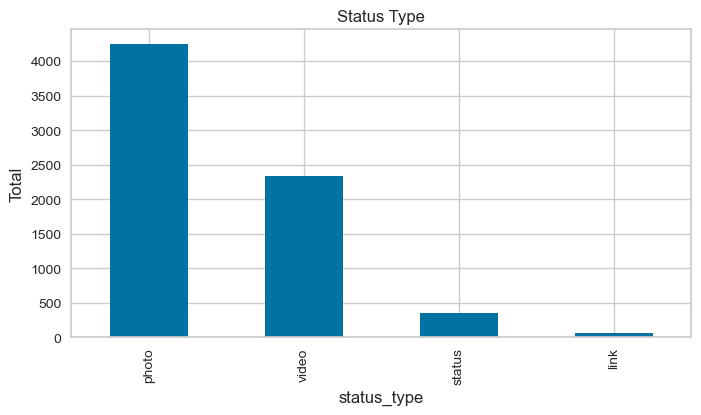

In [13]:
data['status_type'].value_counts().plot(kind='bar',figsize=(8,4),title="Status Type")
plt.xlabel('status_type')
plt.ylabel('Total')
plt.show()

+ **Configuramos el tributos 'status_type'.**

In [14]:
cambio_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}
data.status_type = [cambio_type[item] for item in data.status_type]

2.3.2  **Atributos 'status_published'.**

Contiene la fecha y hora del evento. Creamos diferentes atributos para poder comprender mejor nuestro DataSet.
Aunque anteriormente ya hemos comentado que es un atributo que debemos eliminar.
Podemos ver con este desglose de la fecha, como se distribuyen los eventos a lo largo del tiempo.

+ **Configuramos el tributos 'status_published'.**

In [15]:
# Creamos varios atributos nuevos

data['status_published'] = pd.to_datetime(data['status_published'])

data['año'] = data['status_published'].dt.year
data['mes'] = data['status_published'].dt.month
data['día'] = data['status_published'].dt.day
data['hora'] = data['status_published'].dt.hour

#Elimino el atributo 'status_published'

data=data.drop('status_published',axis=1)

In [16]:
data.head(1)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,año,mes,día,hora
0,1,529,512,262,432,92,3,1,1,0,2018,4,22,6


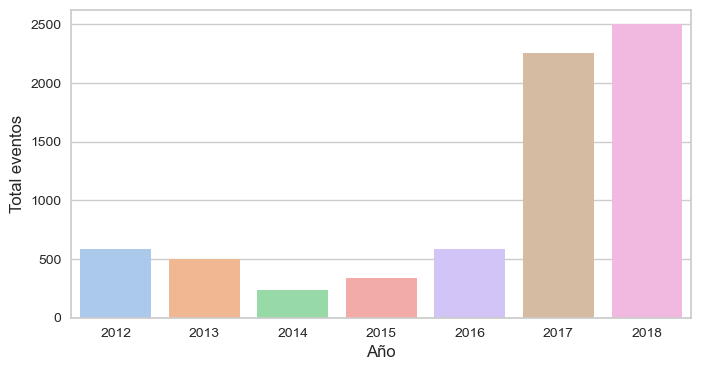

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x=data["año"], palette= "pastel")
plt.xlabel('Año')
plt.ylabel('Total eventos')
plt.show()

Según los datos representados en la gráfica se observa que el máximo número de eventos se producen en el año 2017 y 2018. 

2.4 **Configuramos los atributos**

Pasamos a reconfigurar nuestro DataSet, donde eliminamos las columnas sin valor y eliminamos los duplicados analizados anteriormente.

In [18]:
df1 =data[['status_type','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','año','mes','día','hora']]
#df1=df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6999 non-null   int64
 1   num_reactions  6999 non-null   int64
 2   num_comments   6999 non-null   int64
 3   num_shares     6999 non-null   int64
 4   num_likes      6999 non-null   int64
 5   num_loves      6999 non-null   int64
 6   num_wows       6999 non-null   int64
 7   num_hahas      6999 non-null   int64
 8   num_sads       6999 non-null   int64
 9   num_angrys     6999 non-null   int64
 10  año            6999 non-null   int64
 11  mes            6999 non-null   int64
 12  día            6999 non-null   int64
 13  hora           6999 non-null   int64
dtypes: int64(14)
memory usage: 820.2 KB


2.5 **Estadística descriptiva del DataSet.**

In [19]:
# Distribución de todos los atributos
features=list(df1.columns)
print(features)
colors =['#58FA82', '#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2', '#F5DA81',
         '#A9F5A9','#58ACFA', '#00FF80', '#DF0101', '#DF013A', '#FF00FF',
         '#40FF00','#58FA82','#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2',
         '#58FA82', '#F5A9A9', '#81DAF5', '#FBEFEF', '#F5A9F2', '#F5DA81']

['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'año', 'mes', 'día', 'hora']


In [20]:
def EstaDescrip(num):
    #Añadimos describe
    df = num.describe().T
    #Añadimos la mediana
    df['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    df = df.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(df)

In [21]:
print(Style.BRIGHT +'Estadística descriptiva del Publicacions Facebook Thailandia:'+Style.RESET_ALL)
#data.describe().round(2).T
EstaDescrip(df1[features])


Estadística descriptiva del Publicacions Facebook Thailandia:


,count,mean,median,std,min,25%,50%,75%,max
status_type,6999.0,1.735962,2.0,0.592424,1.0,1.0,2.0,2.0,4.0
num_reactions,6999.0,224.994571,58.0,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,4.0,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,0.0,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,57.0,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,0.0,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,0.0,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,0.0,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,0.0,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.0,0.688582,0.0,0.0,0.0,0.0,31.0


2.6 **Prueba de Contraste de Normalidad.**  
  - Gráfica de Histograma.
  - Gráfico Quantile-Quantile.
  - Prueba Shapiro-Wilks.


In [22]:
def crearquantile(df,columnas):

  
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))

    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        stats.probplot(df[columnas].iloc[: , idx],dist='norm',plot=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        ax.set_title("Gráfica Q-Q "+ str(col))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [23]:
#Bucle para Shapiro-Wilk a todas las columnas del dataset
def crearShapiro(df,columnas):  
    #dataset para la prueba de Shapiro
    datoShapiro=[]
    alfa=0.05
    print(Style.BRIGHT +'Resultado del Test de Hipótesis:'+Style.RESET_ALL)
    #print(Style.BRIGHT + Fore.GREEN+'Shapiro-Wilk: \n'+Style.RESET_ALL)
   
    for i in df[columnas]:        
        stat, p = shapiro(df[i])
        #print(Style.BRIGHT + Fore.BLACK+f'{i}:'+Style.RESET_ALL)
        #print(Fore.RESET+'t-statistic = %.3f\np-value = %.6f' % (stat, p))
        if p > alfa:
            #print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Probably Gaussian']
            datoShapiro.append(sha_datos)
        else:
            #print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Not Probably Gaussian']
            datoShapiro.append(sha_datos)

    TablaShapiro=pd.DataFrame(datoShapiro,
         columns=['Atributo','Stat','p-value','Resultado'])
    TablaShapiro = TablaShapiro.style.set_properties(**{'text-align': 'left'})
    display(TablaShapiro)    

    #print(Fore.RESET+'---------- \n')


- Distribución de los atributos:
 


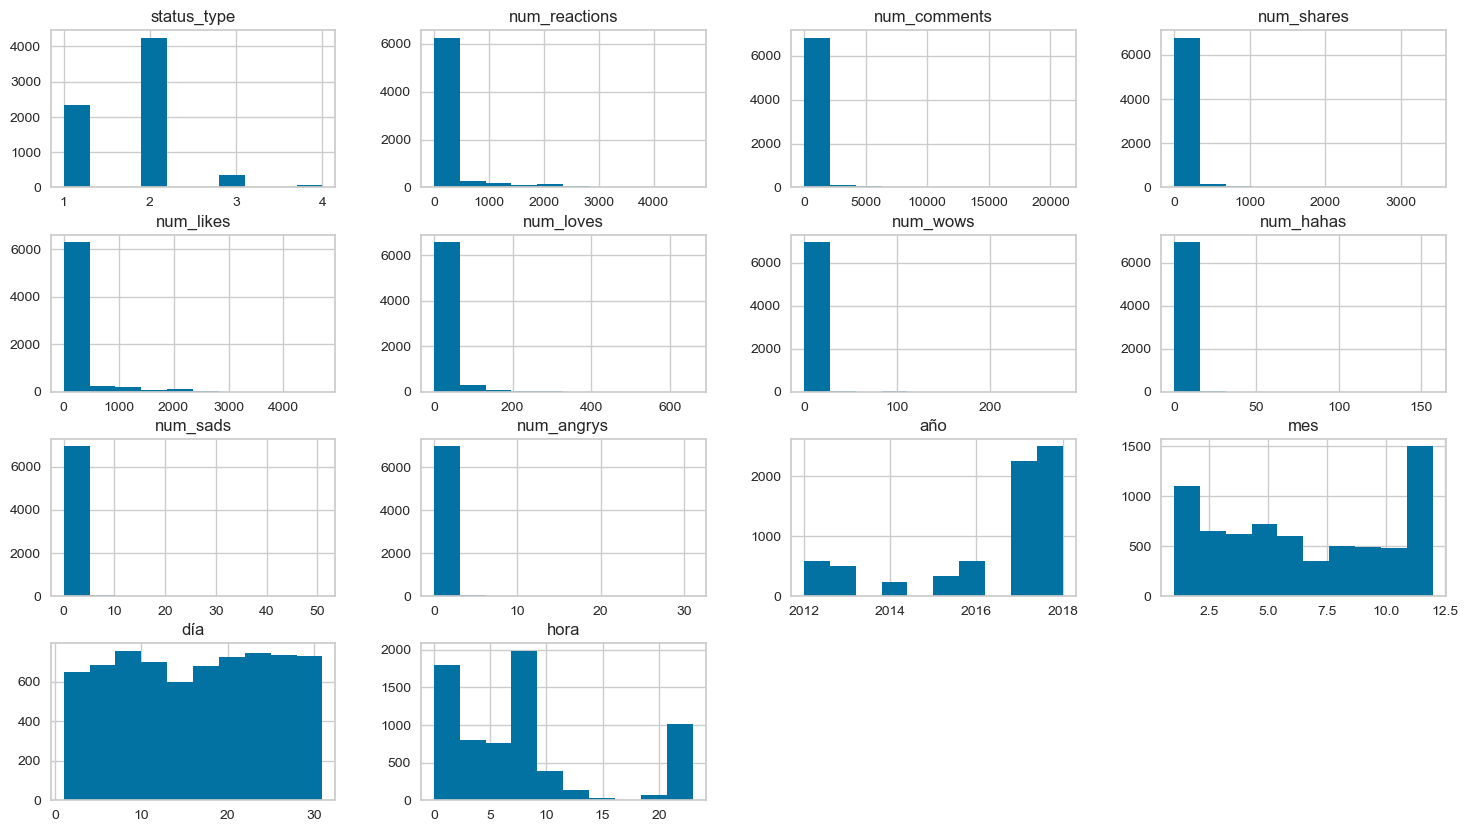

In [24]:
print('\n- Distribución de los atributos:\n ')
df1[df1.columns].hist(figsize=(18,10))
sns.set_theme(style="white", rc=None)

Podemos ver la distribución de cada predictor, algunos de ellos parecen cercanos a una distribución normal, podemos comprobar si siguen una distribución normal utilizando la Prueba de Normalidad de Shapiro-Wilk. Nuestra Hipótesis es:

- H₀: Los datos se distribuyen normalmente.
- H₁: Los datos no se distribuyen normalmente.  

Crearemos una función que compruebe la distribución para cada objetivo:

In [25]:
col_num=df1.select_dtypes(include = ["number"]).columns
print('\n- Prueba Shapiroe-Wilk:\n ')
crearShapiro(df1,col_num)
sns.set_theme(style="white", rc=None)


- Prueba Shapiroe-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,status_type,0.733840,0.000000,Not Probably Gaussian
1,num_reactions,0.508071,0.000000,Not Probably Gaussian
2,num_comments,0.261567,0.000000,Not Probably Gaussian
3,num_shares,0.338363,0.000000,Not Probably Gaussian
4,num_likes,0.486680,0.000000,Not Probably Gaussian
5,num_loves,0.353267,0.000000,Not Probably Gaussian
6,num_wows,0.105688,0.000000,Not Probably Gaussian
7,num_hahas,0.147807,0.000000,Not Probably Gaussian
8,num_sads,0.135600,0.000000,Not Probably Gaussian
9,num_angrys,0.140818,0.000000,Not Probably Gaussian



- Gráfica Quantile-Quantile:
 


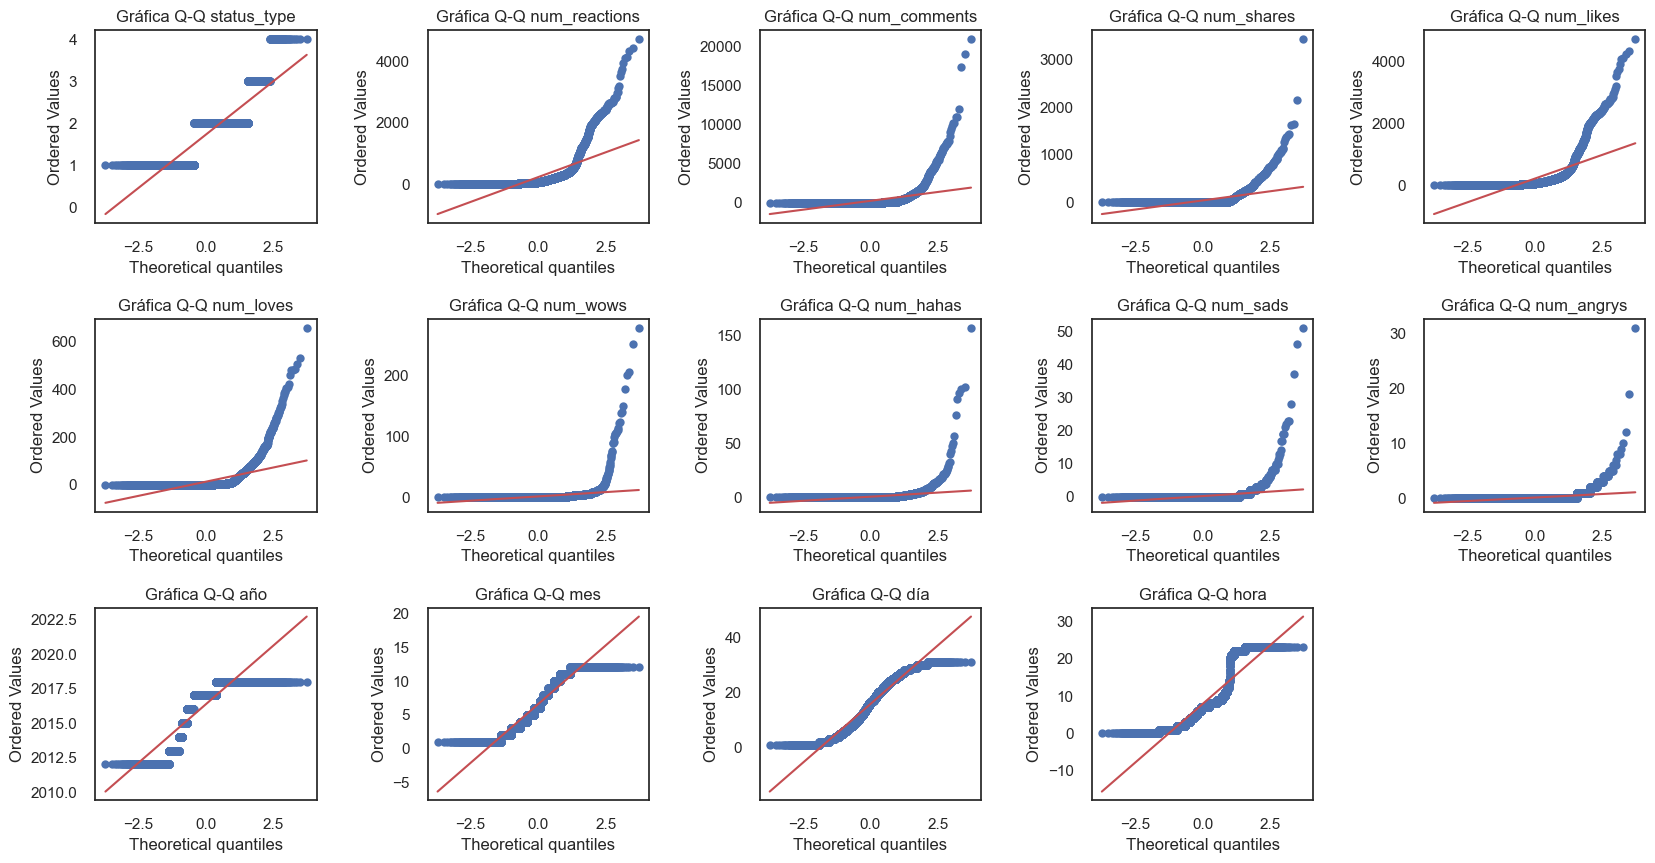

In [26]:
print('\n- Gráfica Quantile-Quantile:\n ')
crearquantile(df1,col_num)
sns.set_theme(style="white", rc=None)

2.7 **Evaulación del coeficiente de correlación de los atributos.**

<Axes: >

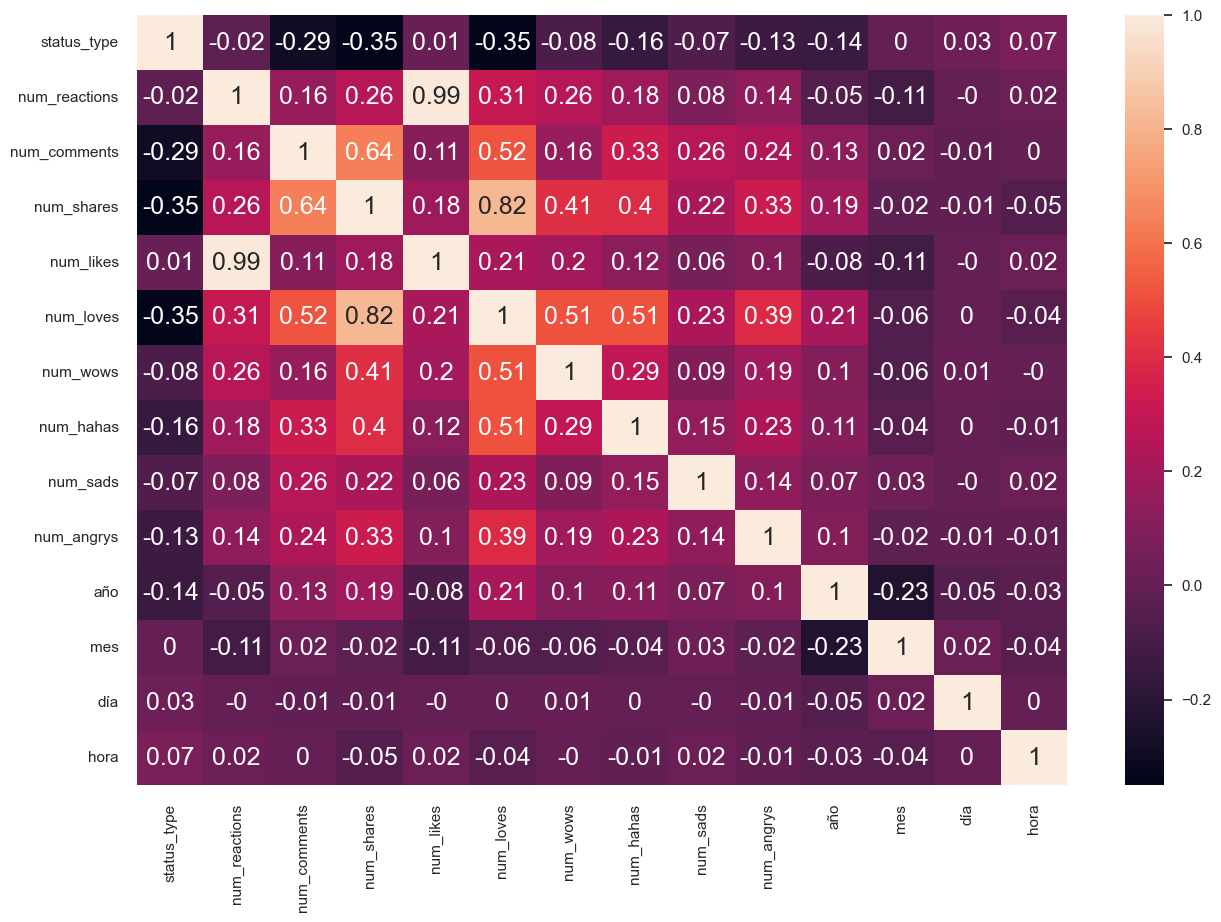

In [27]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data=correlation_matrix, annot=True, annot_kws = {'size':18})


|Coeficiente de correlación de Karl Pearson|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,01 a 0,19| Correlación positiva muy baja |   
| 0,2 a 0,39 | Correlación positiva baja |   
| 0,4 a 0,69 | Correlación positiva moderada |   
| 0,7 a 0,89 | Correlación positiva alta |   


2.8 **Comprobación de Outliers de los atributos.**

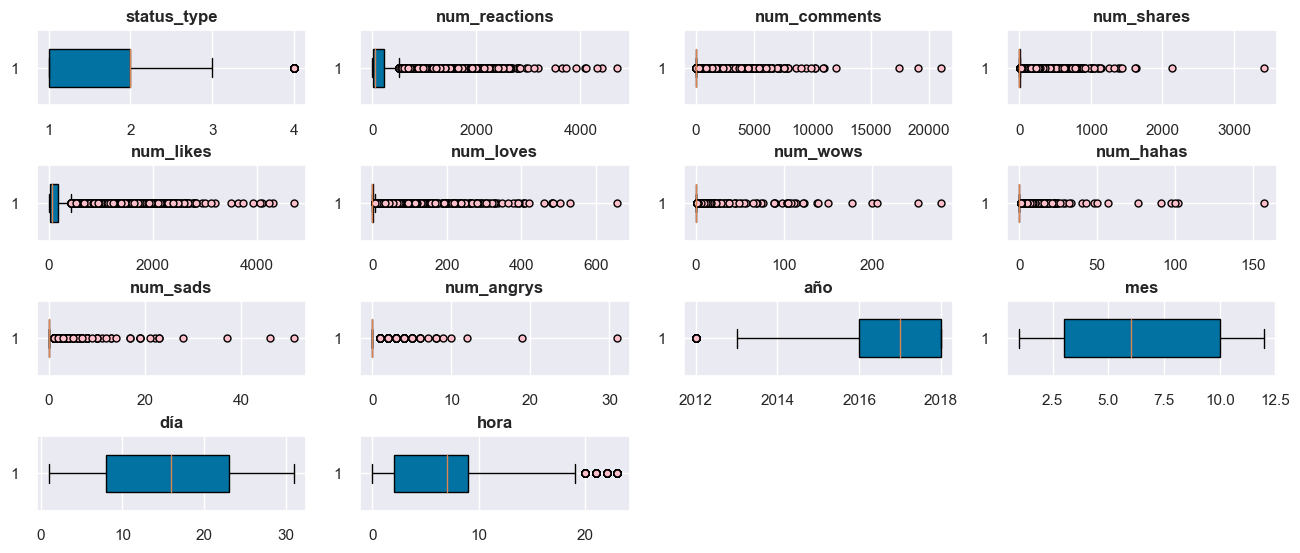

In [28]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='pink', marker='o', markeredgecolor='black', ms=5)

fig, axes = plt.subplots(5, 4, figsize=(16, 8))

for idx, (col, ax) in enumerate(zip(df1.columns, axes.flatten())):
    ax.boxplot(df1[col], flierprops=red_circle, vert=False,
              patch_artist=True, notch = False, widths = 0.5)
    ax.set_title(col, fontweight='bold')
    plt.subplots_adjust(wspace=.2, hspace=.8)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

Podemos observar que el atriburo num_comments, tiene valores atípicos?.

In [29]:
df1.nlargest(3, 'num_comments')

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,año,mes,día,hora
498,1,564,20990,154,473,82,3,3,3,0,2016,11,30,8
480,1,452,19013,161,353,92,2,3,2,0,2016,12,9,21
6757,1,708,17404,913,525,157,6,14,4,2,2017,9,25,10


In [30]:
# Realizamos un drop.
df1 = df1.drop([498,480,6757], axis=0)

************

### <font color='#d50283'>- Exercici 1</font>
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [31]:
# Comprobación de predicción y precisión
#Añadir valores ejercicio 2
dfmetricas=[]
dfmetricas = pd.DataFrame(dfmetricas,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette'])

Vmodelo=[]
Vtitulo=[]


In [32]:
#df1=df1[['status_type', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
# data[['status_type','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','año','mes','día','hora']]

df1=data[['status_type', 'num_shares', 'num_likes', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]


In [33]:
df1

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys
0,1,262,432,3,1,1,0
1,2,0,150,0,0,0,0
2,1,57,204,1,1,0,0
3,2,0,111,0,0,0,0
4,2,0,204,0,0,0,0
...,...,...,...,...,...,...,...
7045,2,0,89,0,0,0,0
7046,2,0,14,0,1,0,0
7047,2,0,1,0,0,0,0
7048,2,22,349,0,0,0,0


#### 1.1 Método K-means.

Usamos el <font color='##08a22a'></font>[Elbow Method](<https://www.scikit-yb.org/en/latest/api/cluster/elbow.html>) para encontrar en número de cluster.



In [34]:
plt.figure(figsize=(10,5))

cs = []
dfvalor = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    labels = kmeans.labels_

    preds = kmeans.fit_predict(df1)
    
    if i>1: score = metrics.silhouette_score(df1, preds)
    else: score=0.00
    cs.append(kmeans.inertia_)
    
    #guardar
    dfvalor.append(['KMeans', i, kmeans.inertia_,round(score,2)])
    
    
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
    
    


<Figure size 1000x500 with 0 Axes>

Según los datos recogidos de la busqueda clusters, tenemos mejores valores entre el cluster 2 y 3.  Lo comprobamos más adelante con la función KElbowVisualizer. 

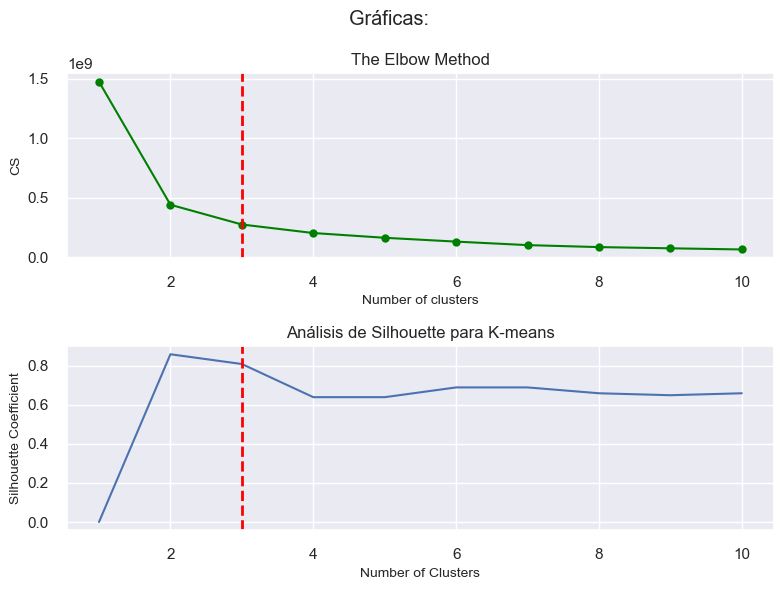

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
fig.suptitle('Gráficas: ')


ax1.plot(range(1, 11), dfmetricas['Inertia'],marker='o',color='green')
ax1.axvline(x = 3 , ymin = 0, color = 'red', linewidth =2, ls = '--' )
ax1.set_title('The Elbow Method',fontsize=12)
ax1.set_xlabel('Number of clusters',fontsize=10)
ax1.set_ylabel('CS',fontsize=10)

ax2.set_title('Análisis de Silhouette para K-means',fontsize=12)
ax2.plot(range(1, 11),dfmetricas['silhouette'])
ax2.axvline(x = 3 , ymin = 0, color = 'red', linewidth =2, ls = '--' )

ax2.set_xlabel("Number of Clusters",fontsize=10)
ax2.set_ylabel("Silhouette Coefficient",fontsize=10)
plt.tight_layout()
plt.show()

In [36]:
#dfmetricas=dfmetricas.drop(dfmetricas[dfmetricas['silhouette'] != dfmetricas['silhouette'].max()].index, axis=0)
dfmetricas=dfmetricas.drop(dfmetricas.iloc[:].index,axis=0)

In [37]:
#dfmetricas

+ **Utilizando KElbowVisualizer**

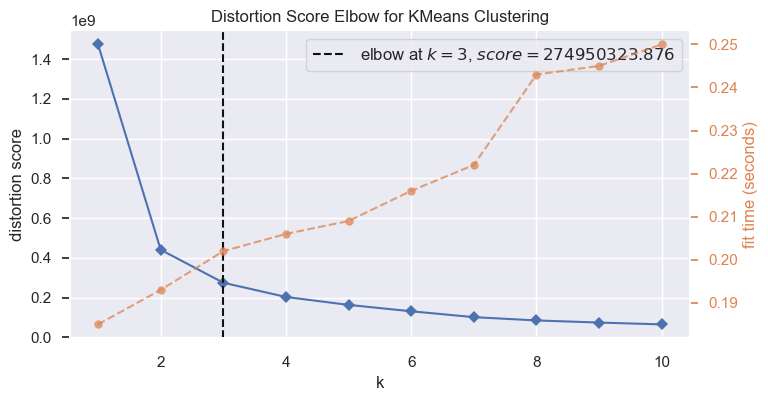

In [38]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(8, 4))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show() 
plt.show()

In [39]:
# k-means clustering

clustering_kmeans = KMeans(n_clusters = visualizer.elbow_value_, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
df1['Clusters']  = clustering_kmeans.fit_predict(df1)

#guardar
score = metrics.silhouette_score(df1, clustering_kmeans.fit_predict(df1))

dfvalor=[]
dfvalor.append(['KMeans', visualizer.elbow_value_, clustering_kmeans.inertia_,round(score,2)])
  
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
    
Vmodelo.append(clustering_kmeans)      
Vtitulo.append('KMeans Original')

In [40]:
dfmetricas

,Tipo Clasificación,Núm Cluster,Inertia,silhouette
0,KMeans,3,2.749505e+08,0.81


+ **Visualización de los datos, utilizando PCA (Principal Component Analisys)**

PCA es un método muy utilizado de aprendizaje no supervisado, que permite reducir el número de dimensiones tratando de recoger la mayor parte de la variabilidad de los datos originales.

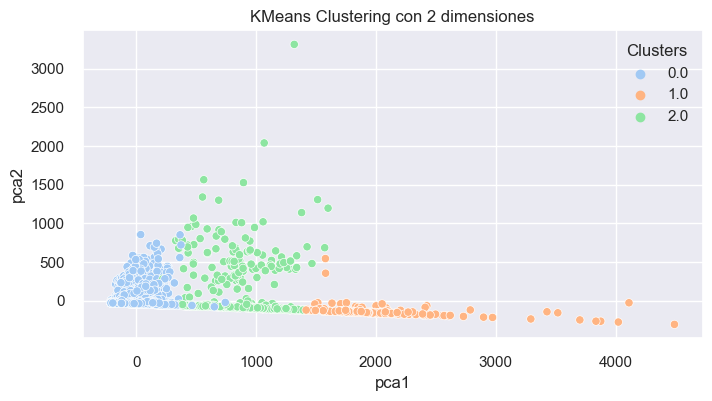

In [41]:
# Para una mejor intrerpretacion de los datos vamos a transformar la base de datos por medio del PCA (Principal Component Analisys)

plt.figure(figsize=(8, 4))
reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "red", 'green']

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette='pastel')
plt.title('KMeans Clustering con 2 dimensiones')
plt.show()

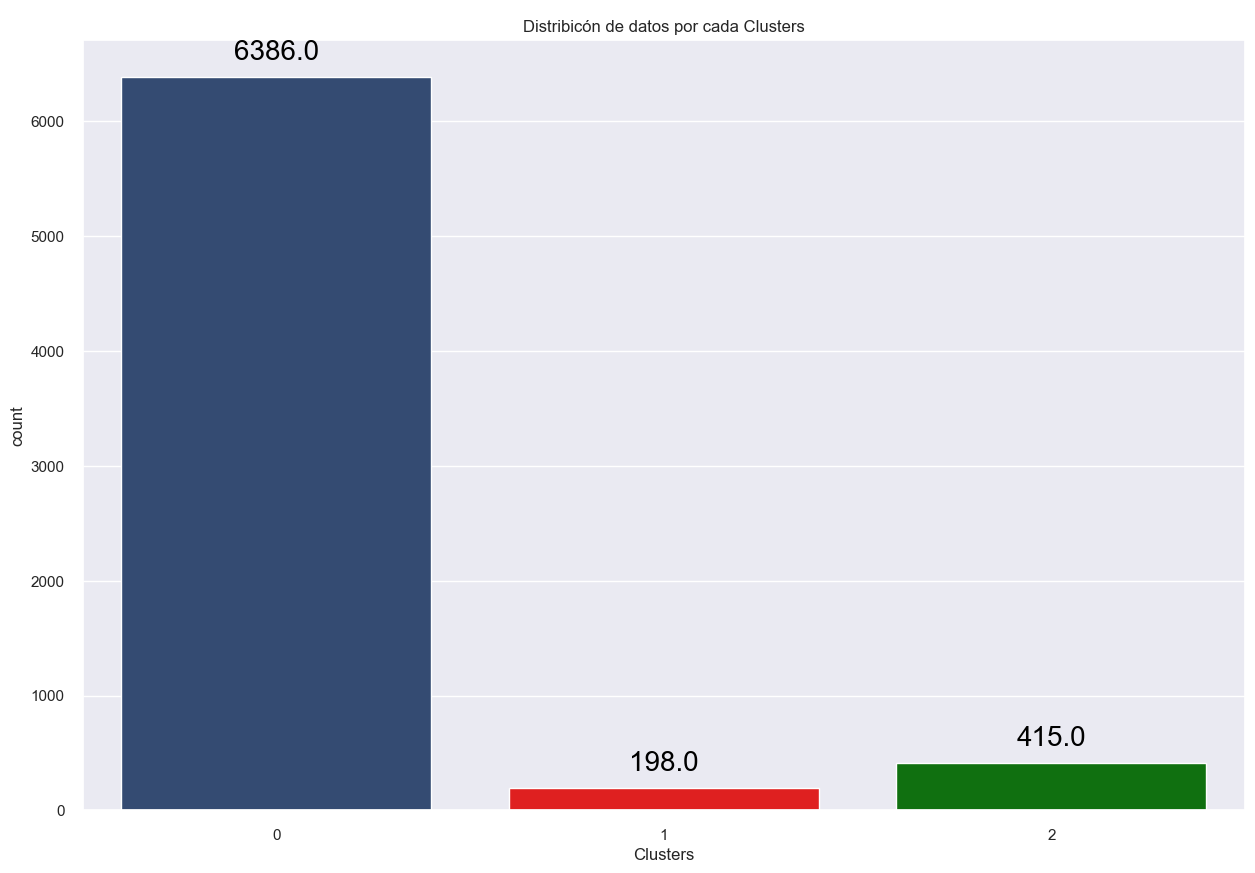

In [42]:
# Cantidad de datos por cluster
pl = sns.countplot(x=df1["Clusters"], palette= pal, data=df1)
pl.set_title("Distribicón de datos por cada Clusters")


for p in pl.patches:
   pl.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='bottom', color='black', size=20)

    
plt.show()

#### 1.2 Normalizar los datos con MinMax().

In [43]:
scaler_MM = MinMaxScaler() 
df1_MM = scaler_MM.fit_transform(df1)
df1_MM = pd.DataFrame(df1_MM,columns=df1.columns)
df1_MM.head(1)

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,0.0,0.076519,0.09172,0.010791,0.006369,0.019608,0.0,0.0


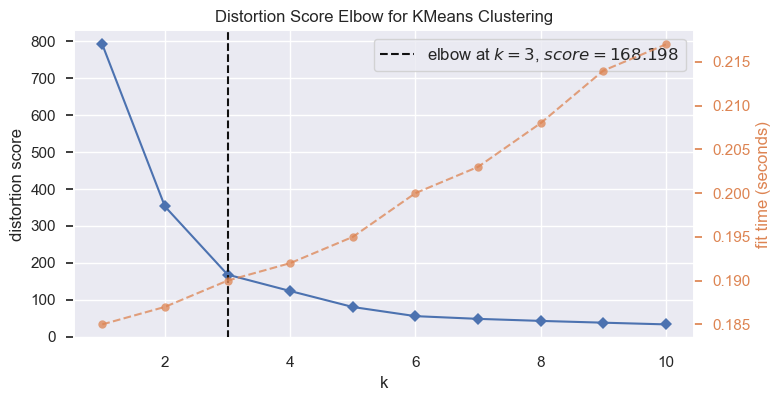

In [44]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(8, 4))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df1_MM)        # Fit the data to the visualizer
visualizer.show() 
plt.show()

In [45]:
clustering_kmeansMM = KMeans(n_clusters = visualizer.elbow_value_, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
df1_MM ['Clusters']  = clustering_kmeansMM.fit_predict(df1_MM)
score = metrics.silhouette_score(df1_MM, clustering_kmeansMM.fit_predict(df1_MM))

dfvalor = []    
#guardar
dfvalor.append(['KMeans MinMaxScaler()', 3, clustering_kmeansMM.inertia_,round(score,2)]) 
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
Vmodelo.append(clustering_kmeansMM)      
Vtitulo.append('KMeans MinMaxScaler')

In [46]:
dfmetricas

,Tipo Clasificación,Núm Cluster,Inertia,silhouette
0,KMeans,3,2.749505e+08,0.81
0,KMeans MinMaxScaler(),3,1.346861e+02,0.91


#### 1.3 Normalizar los datos con normalize().

In [47]:
scaler_nor = normalize(df1)
df1_nor = pd.DataFrame(scaler_nor,columns=df1.columns)

df1_nor.head(1)

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,0.001979,0.518553,0.855018,0.005938,0.001979,0.001979,0.0,0.0


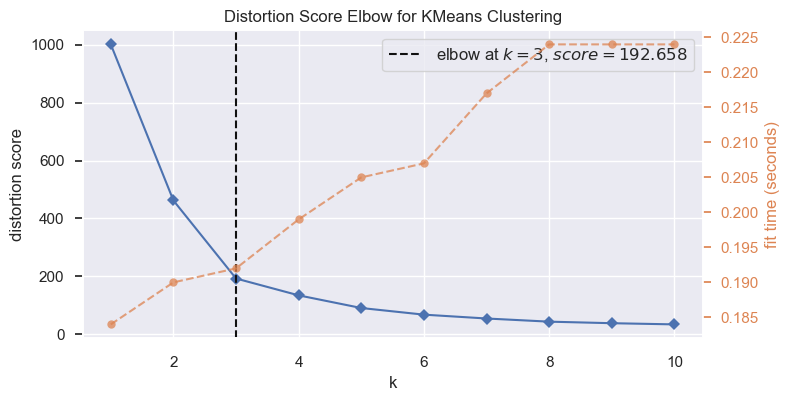

In [48]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(8, 4))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df1_nor)        # Fit the data to the visualizer
visualizer.show() 
plt.show()

In [49]:
clustering_kmeansNor = KMeans(n_clusters = visualizer.elbow_value_, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
df1_nor ['Clusters']  = clustering_kmeansNor.fit_predict(df1_nor)

score = metrics.silhouette_score(df1_nor, clustering_kmeansNor.fit_predict(df1_nor))
dfvalor = []    
#guardar
dfvalor.append(['KMeans Normalize()', 3, clustering_kmeansNor.inertia_,round(score,2)])  
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
Vmodelo.append(clustering_kmeansNor)
Vtitulo.append('KMeans Normalize')

Con los datos escalados, tanto utilizando un tipo de escalado u otro, el comportamiento es parecido,.  Volvemos a tener 3 cluster.

#### 1.4 Método BIRCH.

El clustering BIRCH (BIRCH es la abreviatura de Balanced Iterative Reducing and Clustering using Hierarchies) consiste en construir una estructura de árbol de la que se extraen los centroides de los clusters.

In [50]:
df1_BIRCH = pd.DataFrame(df1,columns=df1.columns)


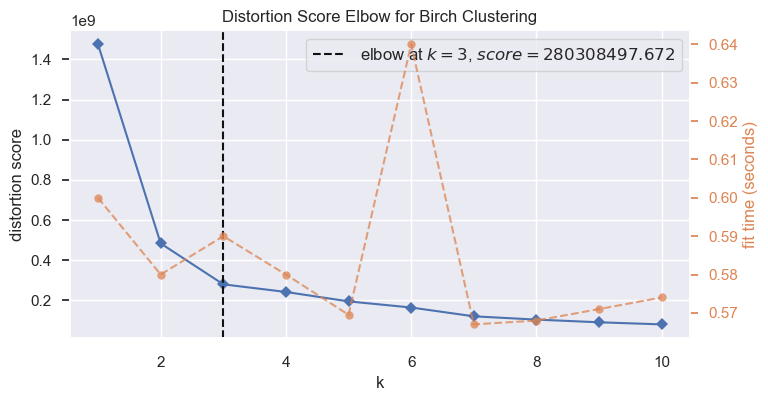

In [51]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(8, 4))
model = Birch()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df1_BIRCH)        # Fit the data to the visualizer
visualizer.show() 
plt.show()

In [52]:
clustering_Birch = Birch(n_clusters = visualizer.elbow_value_)
df1_BIRCH['Clusters'] = clustering_Birch.fit_predict(df1_BIRCH)

score = metrics.silhouette_score(df1_BIRCH, clustering_Birch.fit_predict(df1_BIRCH))

dfvalor = []    
#guardar
dfvalor.append(['BIRCH', 3, clustering_kmeans.inertia_,round(score,2)])  
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
Vmodelo.append(clustering_Birch) 
Vtitulo.append('BIRCH')

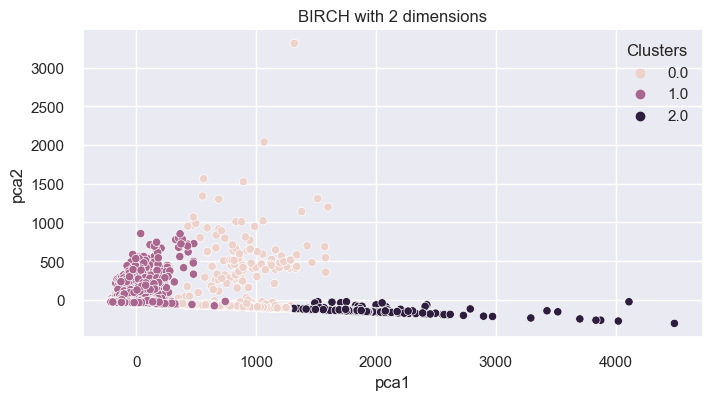

In [53]:
reduced_data = PCA(n_components=2).fit_transform(df1_BIRCH)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
plt.figure(figsize=(8, 4))
sns.scatterplot(x="pca1", y="pca2", hue=df1_BIRCH['Clusters'], data=results)
plt.title('BIRCH with 2 dimensions')
plt.show()

+ **Distribución de los Clusters.**

Dado que se trata de una agrupación no supervisada. No disponemos de una característica etiquetada para evaluar la puntuación de nuestro modelo
Vamos a estudiar los patrones en los clusters formados y *+determinar la naturaleza** de los patrones de los clusters.
Para ello, echaremos un vistazo a los datos a la luz de los clusters mediante el análisis exploratorio de datos y sacaremos conclusiones



https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers/notebook

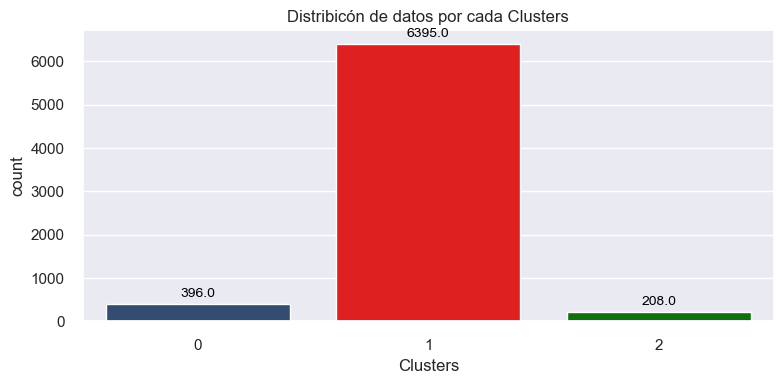

In [54]:
# Cantidad de datos por cluster
plt.figure(figsize=(8, 4))
pl = sns.countplot(x=df1_BIRCH["Clusters"], palette= pal, data=df1_BIRCH)
pl.set_title("Distribicón de datos por cada Clusters")


for p in pl.patches:
   pl.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='bottom', color='black', size=10)

plt.tight_layout()
plt.show()

A calculado 3 cluster el metodo Birch.  Se observa que los tres cluster no estan distribuidos equitativamente.

Existen dos técnicas útiles para corregir la distribución de clases desequilibradas:    
- Oversampling
- Undersampling

+ **Función undersampling.**

In [55]:
def downsample(df, label_col_name):
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [56]:
df_us = downsample(df1_BIRCH, 'Clusters')

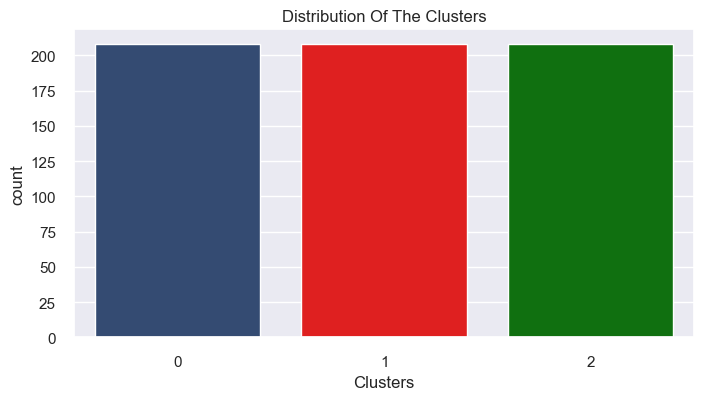

In [57]:
plt.figure(figsize=(8, 4))
pl = sns.countplot(x=df_us["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [58]:
def underCluster(df,columnas,pivot,cluster):
        fig, axes = plt.subplots(2, 3, figsize=(20, 20))
        
        for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
           sns.scatterplot(data=df, y=df[columnas].iloc[: , idx], x=df[pivot], hue=df[cluster], ax=ax,palette= pal)
           plt.subplots_adjust(wspace=.5, hspace=.5)
           ax.set_title("Cluster's Profile Based on Likes And "+ str(col), fontsize=16)
           ax.set_xlabel(pivot,fontsize=16)
           ax.set_ylabel(col,fontsize=16)  
        else:
            [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

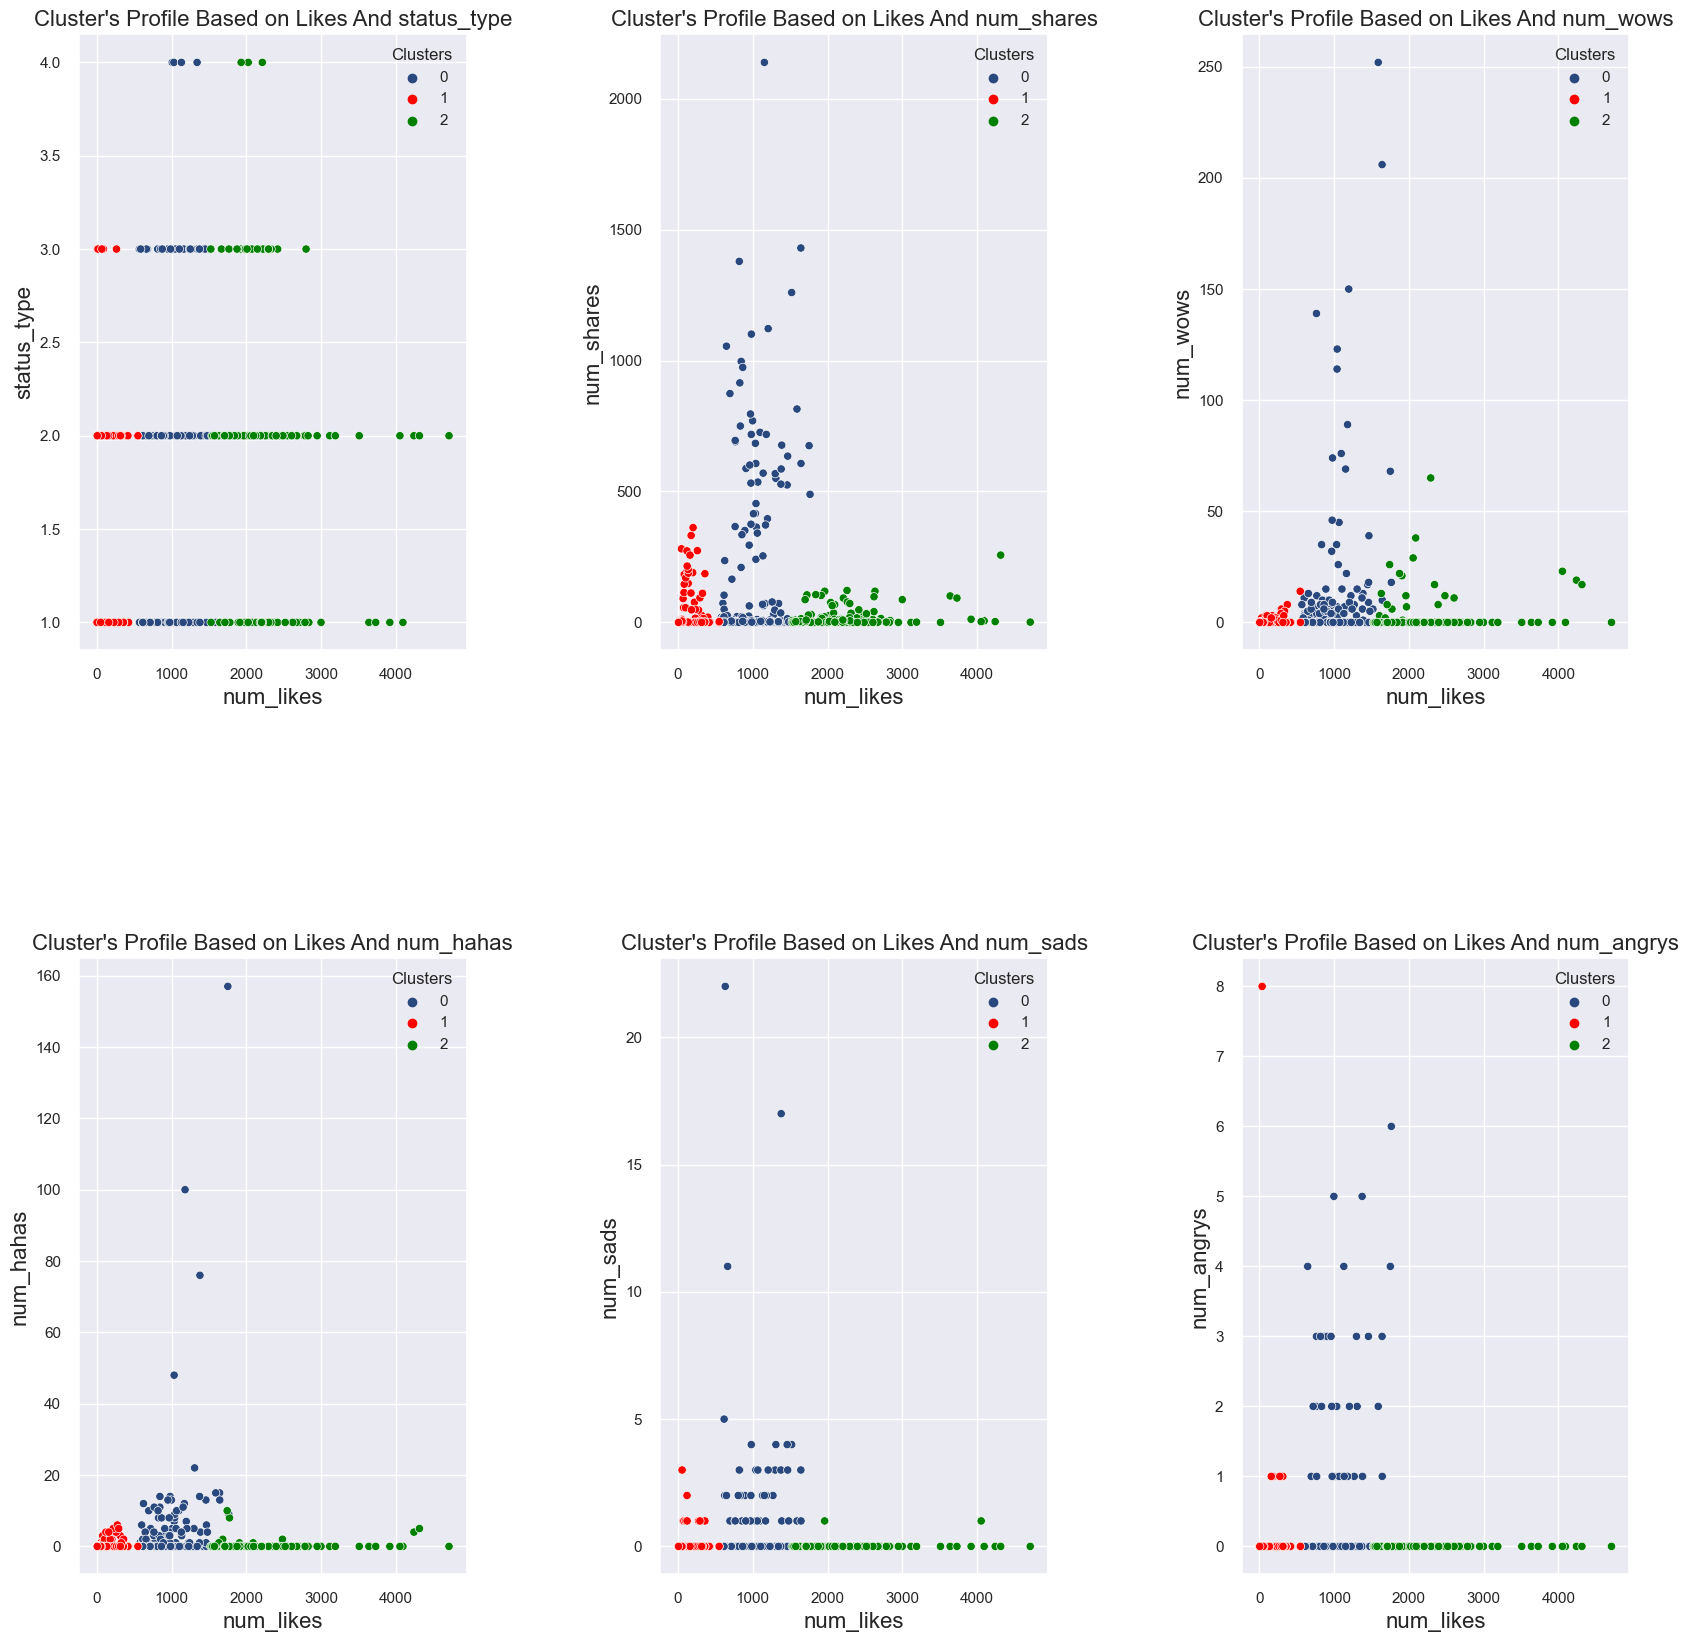

In [59]:

columnas=['status_type', 'num_shares', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
pivot='num_likes'
cluster='Clusters'
          
underCluster(df_us,columnas,pivot,cluster)

 
Explicación gráficas superiores:   
Hemos partido de la base de analizar los likes respecto al resto de atributos, teniendo en cuenta los cluster generados.  El método utilizado para estas gráficas ha sido BIRCH.
Podemos observar en todas las gráficas que el grupo 1(rojo) son los vendedores que menos estan valorados o menos likes tienen.    
En la gráfica 2, vemos que los vendedores que más comporten son los cluster 0 y 1.    
En la gráfica 3, a partir de 700 likes es cuando más wows.
Los vendedores mejor valorados o más likes tienen serían el cluster 2, etc...

************

### <font color='#d50283'>- Exercici 2</font>
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

#### 2.1 Método  Agglomerative Clustering.



In [60]:
df2=data[['status_type', 'num_shares', 'num_likes', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

#Normalizamos los datos

scaler_nor = normalize(df2)
df2_nor = pd.DataFrame(scaler_nor,columns=df2.columns)
df2_nor.head(1)

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys
0,0.001979,0.518553,0.855018,0.005938,0.001979,0.001979,0.0


In [61]:
# agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=3)
df2['Clusters'] = clustering_Agg.fit_predict(df2)

score = metrics.silhouette_score(df2, clustering_Agg.fit_predict(df2))

dfvalor = []    
#guardar
dfvalor.append(['Agglomerative clustering', 3, 0,round(score,2)])  
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
Vmodelo.append(clustering_Agg) 
Vtitulo.append('Agglomerative clustering')

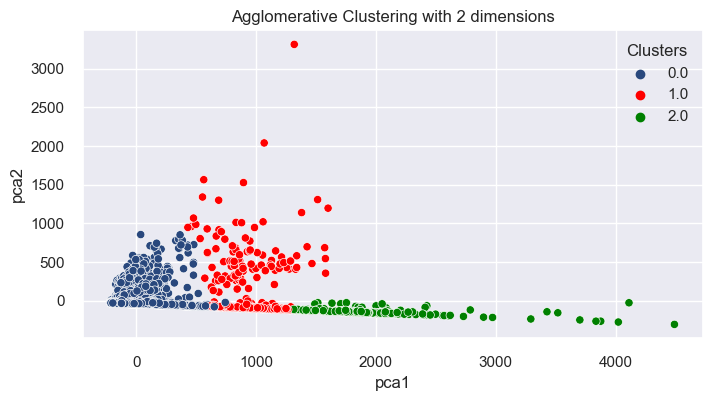

In [62]:
# Para visualizarlo mejor transformamos todas las columnas a dos por medio del PCA
plt.figure(figsize=(8, 4))
reduced_data = PCA(n_components=2).fit_transform(df2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df2['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

#### 2.1 Método  Dendograma - Hierartichical Clustering.



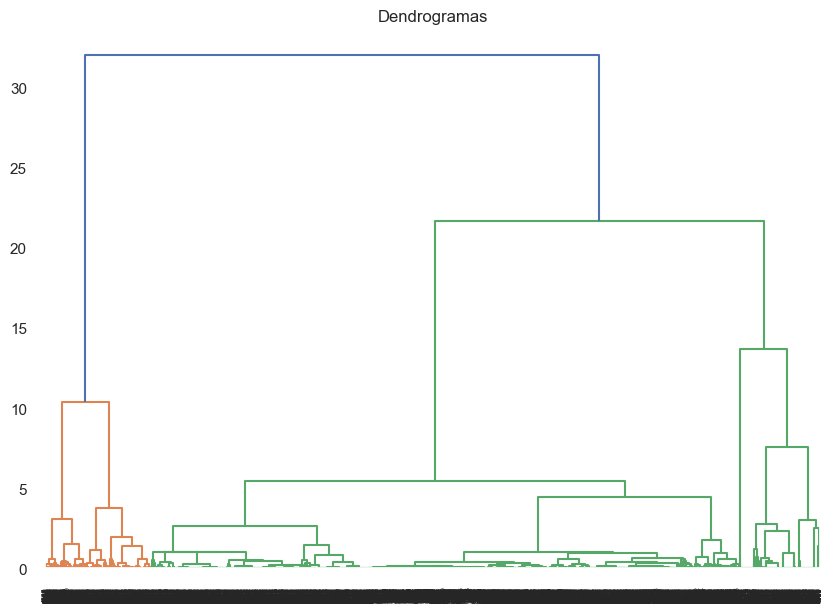

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas")  
dend = sch.dendrogram(sch.linkage(df2_nor, method='ward'))

Encontrar un número interesante de clusters en un dendrograma es lo mismo que encontrar el espacio horizontal más grande que no tiene líneas verticales (el espacio con las líneas verticales más largas). Esto significa que hay más separación entre los grupos.

Podemos dibujar una línea horizontal que pase por esa distancia más larga: En este caso par y=16, luego nos da 3 clusters.



---



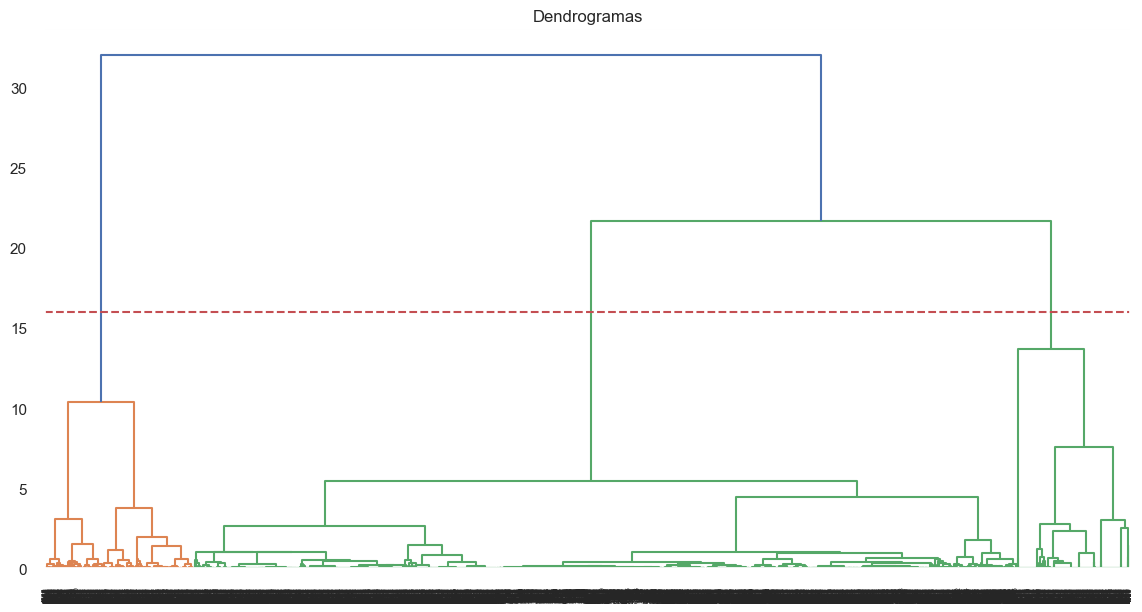

In [64]:
plt.figure(figsize=(14, 7))  
plt.title("Dendrogramas")  
dend = sch.dendrogram(sch.linkage(df2_nor, method='ward'))
plt.axhline(y=16, color='r', linestyle='--')

In [65]:
# 3 Cluster

cluster_AggNor = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_AggNor.fit_predict(df2_nor)


df2_nor['Clusters'] = cluster_AggNor.labels_

score = metrics.silhouette_score(df2_nor, cluster_AggNor.fit_predict(df2_nor))

dfvalor = []    
#guardar
dfvalor.append(['Agg clustering Nor', 3, 0,round(score,2)])  
dfmetricas=dfmetricas.append(pd.DataFrame(dfvalor,columns=['Tipo Clasificación','Núm Cluster','Inertia','silhouette']))
Vmodelo.append(cluster_AggNor)  
Vtitulo.append('Agglomerative clustering Normalize')

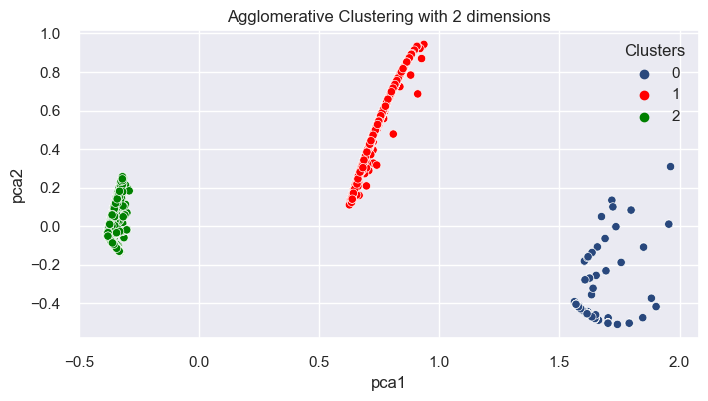

In [66]:
# Para visualizarlo mejor transformamos todas las columnas a dos por medio del PCA
plt.figure(figsize=(8, 4))
reduced_data = PCA(n_components=2).fit_transform(df2_nor)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df2_nor['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

************

### <font color='#d50283'>- Exercici 3</font>
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

+ **Utilizamos el último DataSet:**

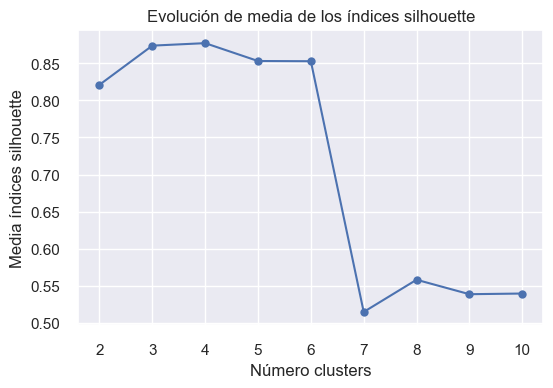

In [67]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================

range_n_clusters = range(2, 11)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df2_nor)
    silhouette_avg = silhouette_score(df2_nor, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

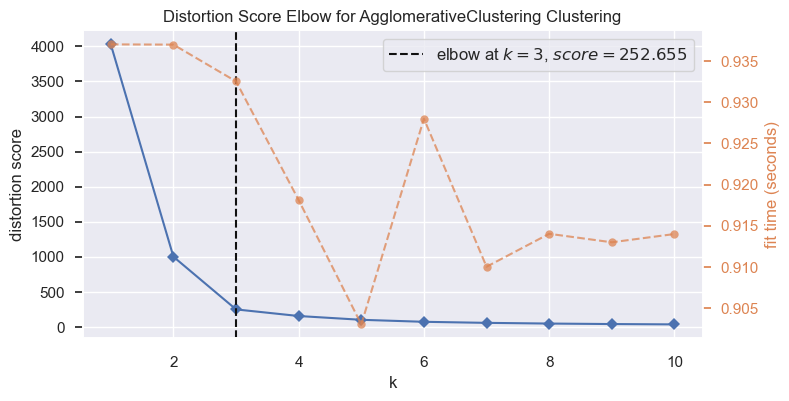

In [68]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(8, 4))
model =     modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward'
             )
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df2_nor)        # Fit the data to the visualizer
visualizer.show() 
plt.show()

+ **Métricas Generales de todos los Dataset generados a lo largo de los ejercicios:**

In [69]:
dfmetricas

,Tipo Clasificación,Núm Cluster,Inertia,silhouette
0,KMeans,3,2.749505e+08,0.81
0,KMeans MinMaxScaler(),3,1.346861e+02,0.91
0,KMeans Normalize(),3,1.926565e+02,0.87
0,BIRCH,3,2.749505e+08,0.81
0,Agglomerative clustering,3,0.000000e+00,0.82
0,Agg clustering Nor,3,0.000000e+00,0.87


************

### Conclusiones:

+ Utilizar PCA nos permite una muy buena visualización de los datos,  para dibujar los cluster de forma muy visual.
+ Como podemos observar en la última tabla, la estandarización y/o normalización es un trabajo que debemos realizar para decidir que método utilizar.
+ La puntuación de silhouette nos ayuda a decidir que número de cluster necesitamos.
+ La decisión de eligir los atributos, es lo que tengo más dudas personalmente.  Al final he realizado
bastantes pruebas.  En este ejercicio debo seguir profundizando, tengo todavia bastantes preguntas que no me he respondido.

    
    

### <font color='#d50283'>Bibliográfia utilizada</font>

- <font color='##08a22a'>*Información del Sprint 08.*</font>
- <font color='##08a22a'></font> [facebook-live-sellers](<https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers>)    
- <font color='##08a22a'></font> [plot_kmeans_silhouette_analysis](<https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html>)  

In [70]:
!pip install session_info
import session_info


session_info.show()

In [71]:
!pip freeze > requirements.txt